In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r3-good.csv')
dfm = pd.read_csv('wat-r3-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,19,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,23,26,2,2,1
1,82,1,4,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,13,26,1,2,1
2,360,1,4,0xeadc0,0,0,3,2,8,0,0,23,7,344,3,5,23,1,1,1
3,420,1,4,0xeadc0,2,0,3,2,8,18,2,23,7,412,3,19,24,1,1,1
4,636,1,4,0x1a1c0,0,0,3,2,8,0,0,23,7,620,6,15,28,1,1,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,19,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,52,59,2,2,0
1,82,1,4,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,25,59,1,2,0
2,360,1,4,0xeadc0,0,0,3,2,8,0,0,23,7,344,7,10,40,1,1,0
3,420,1,4,0xeadc0,2,0,3,2,8,18,2,23,7,412,7,38,43,1,1,0
4,432,1,4,0x1b7dc0,0,0,3,2,8,1,1,23,7,420,8,24,43,1,1,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,19,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,23,26,2,2,1
1,82,1,4,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,13,26,1,2,1
2,360,1,4,0xeadc0,0,0,3,2,8,0,0,23,7,344,3,5,23,1,1,1
3,420,1,4,0xeadc0,2,0,3,2,8,18,2,23,7,412,3,19,24,1,1,1
4,636,1,4,0x1a1c0,0,0,3,2,8,0,0,23,7,620,6,15,28,1,1,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,19,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,23,26,2,2,1
13027,19,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,52,59,2,2,0
13028,82,1,4,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,25,59,1,2,0
1,82,1,4,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,13,26,1,2,1
13029,360,1,4,0xeadc0,0,0,3,2,8,0,0,23,7,344,7,10,40,1,1,0
2,360,1,4,0xeadc0,0,0,3,2,8,0,0,23,7,344,3,5,23,1,1,1
3,420,1,4,0xeadc0,2,0,3,2,8,18,2,23,7,412,3,19,24,1,1,1
13030,420,1,4,0xeadc0,2,0,3,2,8,18,2,23,7,412,7,38,43,1,1,0
13031,432,1,4,0x1b7dc0,0,0,3,2,8,1,1,23,7,420,8,24,43,1,1,0
13032,492,1,4,0x1b7dc0,2,0,3,2,8,18,2,23,7,484,8,7,43,1,1,0


In [12]:
df.to_csv('wat-r3-pkt.csv',index=False)

In [13]:
df = pd.read_csv("wat-r3-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,19,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,23,26,2,2,1
1,19,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,52,59,2,2,0
2,82,1,4,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,25,59,1,2,0
3,82,1,4,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,13,26,1,2,1
4,360,1,4,0xeadc0,0,0,3,2,8,0,0,23,7,344,7,10,40,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25828,3251384,1,4,0x1152c0,4,1,1,2,8,0,0,27,11,3251361,10026,16,26,1,1,1
25829,3251391,1,4,0x1152c0,4,2,1,2,8,0,0,27,11,3251361,10026,10,26,1,1,1
25830,3251398,1,4,0x1152c0,4,3,1,2,8,0,0,27,11,3251361,10026,2,26,1,1,1
25831,3251405,1,4,0x1152c0,4,4,2,2,8,0,0,27,11,3251361,10026,39,42,1,1,1


In [14]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,-0.048798,0.088284,0.002045,0.027032,-0.039246,NaN,-0.058225,-0.099099,-0.111337,0.121594,0.140190,1.000000,0.980844,0.025398,0.040408,-0.231059,-0.276049,0.087073
outport,-0.048798,1.000000,-0.963922,0.367182,-0.012711,0.018460,NaN,0.648152,0.825993,0.919783,-0.482738,-0.429250,-0.048794,-0.046925,-0.056047,0.017022,0.039378,0.083733,-0.000914
inport,0.088284,-0.963922,1.000000,-0.373409,0.024292,-0.035279,NaN,-0.670674,-0.876646,-0.958038,0.638248,0.622591,0.088279,0.085282,0.109628,0.049688,-0.054865,-0.097252,0.002314
packet_type,0.002045,0.367182,-0.373409,1.000000,0.431194,-0.626219,NaN,0.009232,0.233098,0.305372,-0.302665,-0.206394,0.002049,0.006153,0.060192,-0.041163,0.033802,0.020670,0.006673
flit_id,0.027032,-0.012711,0.024292,0.431194,1.000000,-0.115772,NaN,-0.140261,-0.150502,-0.092533,0.146562,0.068953,0.027026,0.028869,0.022681,0.090347,0.029179,0.011137,0.004987
flit_type,-0.039246,0.018460,-0.035279,-0.626219,-0.115772,1.000000,NaN,0.203700,0.218573,0.134384,-0.212851,-0.100139,-0.039250,-0.041926,-0.190843,0.031240,-0.023620,0.033293,-0.007242
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,-0.058225,0.648152,-0.670674,0.009232,-0.140261,0.203700,NaN,1.000000,0.566466,0.631759,-0.423344,-0.409993,-0.058223,-0.055841,-0.083704,-0.002443,0.050421,0.081306,-0.003521
src_ni,-0.099099,0.825993,-0.876646,0.233098,-0.150502,0.218573,NaN,0.566466,1.000000,0.963601,-0.625348,-0.630701,-0.099093,-0.097554,-0.188385,-0.099308,0.041519,0.091229,-0.007063
src_router,-0.111337,0.919783,-0.958038,0.305372,-0.092533,0.134384,NaN,0.631759,0.963601,1.000000,-0.639898,-0.633137,-0.111331,-0.109169,-0.136778,-0.050920,0.068676,0.114958,-0.017610


In [15]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [16]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,1,4,0,0,3,2,8,23,7,3,0,2,2
1,1,4,0,0,3,2,8,23,7,3,0,2,2
2,1,4,2,0,3,2,8,23,7,74,0,1,2
3,1,4,2,0,3,2,8,23,7,74,0,1,2
4,1,4,0,0,3,2,8,23,7,344,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25828,1,4,4,1,1,2,8,27,11,3251361,10026,1,1
25829,1,4,4,2,1,2,8,27,11,3251361,10026,1,1
25830,1,4,4,3,1,2,8,27,11,3251361,10026,1,1
25831,1,4,4,4,2,2,8,27,11,3251361,10026,1,1


In [17]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.000000,0.05,0.05
1,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.000000,0.05,0.05
2,0.25,1.0,0.333333,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000022,0.000000,0.00,0.05
3,0.25,1.0,0.333333,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000022,0.000000,0.00,0.05
4,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000105,0.000680,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25828,0.25,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.00,0.00
25829,0.25,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.00,0.00
25830,0.25,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.00,0.00
25831,0.25,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.00,0.00


In [18]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.963922,0.367182,-0.012711,0.018460,NaN,0.648152,-0.482738,-0.429250,-0.048794,-0.046925,0.039378,0.083733,-0.000914
1,-0.963922,1.000000,-0.373409,0.024292,-0.035279,NaN,-0.670674,0.638248,0.622591,0.088279,0.085282,-0.054865,-0.097252,0.002314
2,0.367182,-0.373409,1.000000,0.431194,-0.626219,NaN,0.009232,-0.302665,-0.206394,0.002049,0.006153,0.033802,0.020670,0.006673
3,-0.012711,0.024292,0.431194,1.000000,-0.115772,NaN,-0.140261,0.146562,0.068953,0.027026,0.028869,0.029179,0.011137,0.004987
4,0.018460,-0.035279,-0.626219,-0.115772,1.000000,NaN,0.203700,-0.212851,-0.100139,-0.039250,-0.041926,-0.023620,0.033293,-0.007242
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.648152,-0.670674,0.009232,-0.140261,0.203700,NaN,1.000000,-0.423344,-0.409993,-0.058223,-0.055841,0.050421,0.081306,-0.003521
7,-0.482738,0.638248,-0.302665,0.146562,-0.212851,NaN,-0.423344,1.000000,0.887791,0.121589,0.119337,-0.038675,-0.075903,0.006422
8,-0.429250,0.622591,-0.206394,0.068953,-0.100139,NaN,-0.409993,0.887791,1.000000,0.140186,0.137996,-0.060150,-0.075758,0.008105
9,-0.048794,0.088279,0.002049,0.027026,-0.039250,NaN,-0.058223,0.121589,0.140186,1.000000,0.980844,-0.231059,-0.276049,0.087073


In [19]:
train_Y = df['target']

In [20]:
train_Y

0        1
1        0
2        0
3        1
4        0
        ..
25828    1
25829    1
25830    1
25831    1
25832    1
Name: target, Length: 25833, dtype: int64

In [21]:
pca = PCA(0.95)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.31991716,  1.05920281,  0.07745564, -0.11109006,  0.11586266,
        -0.17867659],
       [-0.31991716,  1.05920281,  0.07745564, -0.11109006,  0.11586266,
        -0.17867659],
       [-0.27153086,  0.94089603, -0.03972019, -0.06385135,  0.07393751,
        -0.21921738],
       ...,
       [-0.53542763, -0.77608488,  0.15583263, -0.15041544,  0.10199303,
         0.00361207],
       [-0.53117182, -0.74859049,  0.17423178, -0.55357022,  0.10914864,
        -0.05346344],
       [-0.4850565 ,  0.05231475,  1.06836108, -0.15267147,  0.27954876,
         0.09147556]])

In [24]:
pca.explained_variance_ratio_

array([0.40737481, 0.18161161, 0.16533962, 0.10339611, 0.07846239,
       0.03435104])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

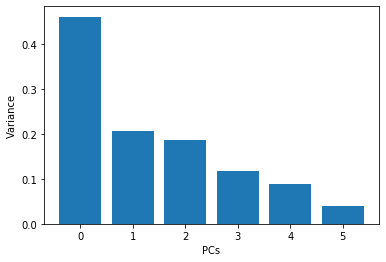

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,-0.319917,1.059203,0.077456,-0.111090,0.115863,-0.178677
1,-0.319917,1.059203,0.077456,-0.111090,0.115863,-0.178677
2,-0.271531,0.940896,-0.039720,-0.063851,0.073938,-0.219217
3,-0.271531,0.940896,-0.039720,-0.063851,0.073938,-0.219217
4,-0.320981,1.056264,0.080597,-0.110746,0.115049,-0.179599
...,...,...,...,...,...,...
25828,-0.521913,-0.570501,0.389573,0.217231,0.104433,-0.063642
25829,-0.528670,-0.673293,0.272703,0.033408,0.103213,-0.030015
25830,-0.535428,-0.776085,0.155833,-0.150415,0.101993,0.003612
25831,-0.531172,-0.748590,0.174232,-0.553570,0.109149,-0.053463


In [28]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,target
0,-0.319917,1.059203,0.077456,-0.111090,0.115863,-0.178677,1
1,-0.319917,1.059203,0.077456,-0.111090,0.115863,-0.178677,0
2,-0.271531,0.940896,-0.039720,-0.063851,0.073938,-0.219217,0
3,-0.271531,0.940896,-0.039720,-0.063851,0.073938,-0.219217,1
4,-0.320981,1.056264,0.080597,-0.110746,0.115049,-0.179599,0
...,...,...,...,...,...,...,...
25828,-0.521913,-0.570501,0.389573,0.217231,0.104433,-0.063642,1
25829,-0.528670,-0.673293,0.272703,0.033408,0.103213,-0.030015,1
25830,-0.535428,-0.776085,0.155833,-0.150415,0.101993,0.003612,1
25831,-0.531172,-0.748590,0.174232,-0.553570,0.109149,-0.053463,1


In [29]:
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,2.168792e-15,9.204596e-16,-7.898183e-16,6.314040e-15,5.099242e-15,-0.006472
1,2.168792e-15,1.000000e+00,3.993258e-15,2.654102e-15,-3.937893e-15,-3.537774e-15,-0.034691
2,9.204596e-16,3.993258e-15,1.000000e+00,5.343706e-15,2.594700e-15,-5.135494e-15,0.022306
3,-7.898183e-16,2.654102e-15,5.343706e-15,1.000000e+00,1.351902e-15,1.937497e-15,0.001025
4,6.314040e-15,-3.937893e-15,2.594700e-15,1.351902e-15,1.000000e+00,-7.828349e-15,-0.001431
5,5.099242e-15,-3.537774e-15,-5.135494e-15,1.937497e-15,-7.828349e-15,1.000000e+00,-0.001511
target,-6.472158e-03,-3.469055e-02,2.230600e-02,1.025327e-03,-1.430657e-03,-1.510503e-03,1.000000


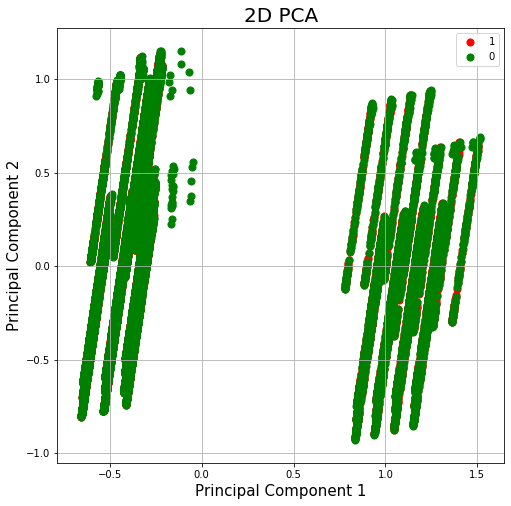

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,1,4,0,0,3,2,8,0,0,23,7,3,0,23,26,2,2,1
1,1,4,0,0,3,2,8,0,0,23,7,3,0,52,59,2,2,0
2,1,4,2,0,3,2,8,18,2,23,7,74,0,25,59,1,2,0
3,1,4,2,0,3,2,8,18,2,23,7,74,0,13,26,1,2,1
4,1,4,0,0,3,2,8,0,0,23,7,344,7,10,40,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25828,1,4,4,1,1,2,8,0,0,27,11,3251361,10026,16,26,1,1,1
25829,1,4,4,2,1,2,8,0,0,27,11,3251361,10026,10,26,1,1,1
25830,1,4,4,3,1,2,8,0,0,27,11,3251361,10026,2,26,1,1,1
25831,1,4,4,4,2,2,8,0,0,27,11,3251361,10026,39,42,1,1,1


In [32]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [33]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [34]:
seed = 7
np.random.seed(seed)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [36]:
model = Sequential()

In [37]:
n_cols = train_X.shape[1]
n_cols

13

In [38]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [40]:
model.fit(x_train, y_train, epochs=50, validation_split=0.4)

Train on 10539 samples, validate on 7027 samples
Epoch 1/50
10539/10539 [==============================] - 2s 169us/step - loss: 0.2500 - accuracy: 0.5017 - val_loss: 0.2500 - val_accuracy: 0.5038
Epoch 2/50
10539/10539 [==============================] - 1s 112us/step - loss: 0.2499 - accuracy: 0.5153 - val_loss: 0.2498 - val_accuracy: 0.5365
Epoch 3/50
10539/10539 [==============================] - 1s 92us/step - loss: 0.2496 - accuracy: 0.5286 - val_loss: 0.2495 - val_accuracy: 0.5310
Epoch 4/50
10539/10539 [==============================] - 1s 100us/step - loss: 0.2494 - accuracy: 0.5324 - val_loss: 0.2492 - val_accuracy: 0.5396
Epoch 5/50
10539/10539 [==============================] - 1s 96us/step - loss: 0.2492 - accuracy: 0.5404 - val_loss: 0.2490 - val_accuracy: 0.5486
Epoch 6/50
10539/10539 [==============================] - 1s 110us/step - loss: 0.2489 - accuracy: 0.5435 - val_loss: 0.2489 - val_accuracy: 0.5526
Epoch 7/50
10539/10539 [==============================] - 1s 95us

In [41]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [42]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.62%


In [43]:
dff = pd.read_csv('wat-r3-pkt.csv',nrows=500)

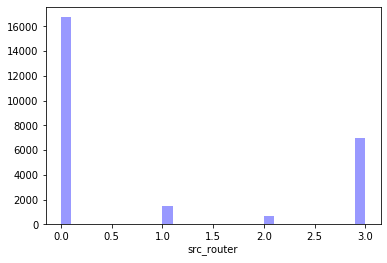

In [44]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

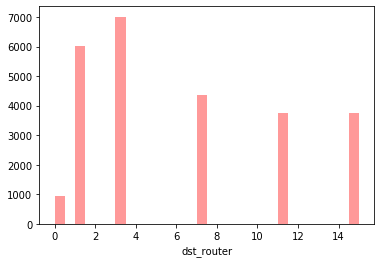

In [45]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

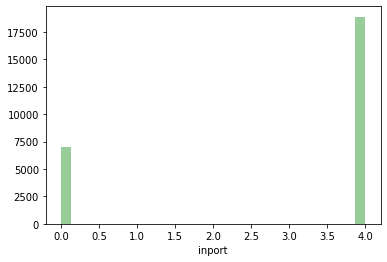

In [46]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

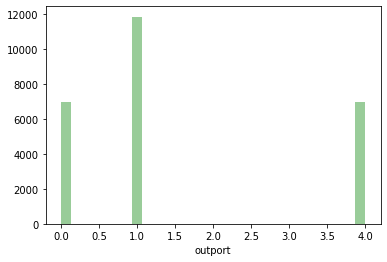

In [47]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

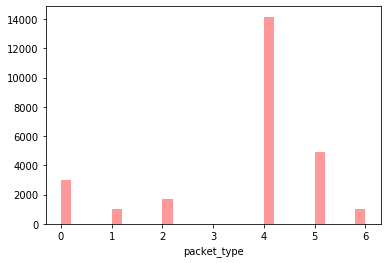

In [48]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')